In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# BBC Premier leaguage top scorer
url = 'https://www.bbc.com/sport/football/premier-league/top-scorers'

In [14]:
# fetch the webpage
try:
    response = requests.get(url)
    response.raise_for_status()
    print('Successfully fetch BBC Data 😊')
except Exception as e:
    print('Failed to Fetch The BBC Data 🙁')
    exit()

Successfully fetch BBC Data 😊


In [15]:
# Parse the html
soup = BeautifulSoup(response.text, 'html.parser')

In [17]:
# Lists to store extracted data
players_name, team_name, goals, assists, played, total_shots = [], [], [], [], [], []

In [18]:
# Find all player rows
all_rows = soup.find('tbody').find_all('tr', class_='ssrcss-dhlz6k-TableRowBody e1icz100')

In [19]:
for row in all_rows:
    try:
        player_name = row.find('div', class_="ssrcss-m6ah29-PlayerName e1n8xy5b1").get_text(strip=True)
        team = row.find('div', class_='ssrcss-qvpga1-TeamsSummary e1n8xy5b0').get_text(strip=True)
        goal = row.find('div', class_="ssrcss-8k20kk-CellWrapper ef9ipf0").get_text(strip=True)

        stats = row.find_all('div', class_="ssrcss-150z8d-CellWrapper ef9ipf0")
        assists_count = stats[0].get_text(strip=True)
        played_count = stats[2].get_text(strip=True)
        shots_count = stats[7].get_text(strip=True)

        # Append data to lists
        players_name.append(player_name)
        team_name.append(team)
        goals.append(int(goal))  # Convert to int for analysis
        assists.append(int(assists_count))
        played.append(int(played_count))
        total_shots.append(int(shots_count))

    except AttributeError:
        print(f"Skipping a row due to missing data.")

In [20]:
# Create DataFrame
df = pd.DataFrame({
    'Player Name': players_name,
    'Team': team_name,
    'Goals': goals,
    'Assists': assists,
    'Played': played,
    'Total Shots': total_shots
})

In [22]:
df.head()

,Player Name,Team,Goals,Assists,Played,Total Shots
0,Mohamed Salah,Liverpool,27,17,29,106
1,E. Haaland,Man City,21,3,28,102
2,A. Isak,Newcastle,19,5,25,69
3,C. Wood,Nottm Forest,18,3,29,53
4,B. Mbeumo,Brentford,15,5,29,62


In [21]:
# Save to CSV
df.to_csv('premier_league_top_scorers.csv', index=False)
print("\nData saved to CSV!")


Data saved to CSV!


In [24]:
# Basic Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player Name  39 non-null     object
 1   Team         39 non-null     object
 2   Goals        39 non-null     int64 
 3   Assists      39 non-null     int64 
 4   Played       39 non-null     int64 
 5   Total Shots  39 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.0+ KB


In [26]:
df.describe()

,Goals,Assists,Played,Total Shots
count,39.000000,39.000000,39.000000,39.000000
mean,10.128205,4.128205,26.358974,58.512821
std,4.612223,2.820783,2.590338,19.177662
min,7.000000,0.000000,20.000000,31.000000
25%,7.000000,3.000000,25.500000,44.500000
50%,8.000000,4.000000,27.000000,53.000000
75%,12.000000,5.000000,28.000000,64.500000
max,27.000000,17.000000,29.000000,106.000000


<ipython-input-27-d24e92588ddd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Goals', y='Player Name', data=top_scorers, palette='viridis')


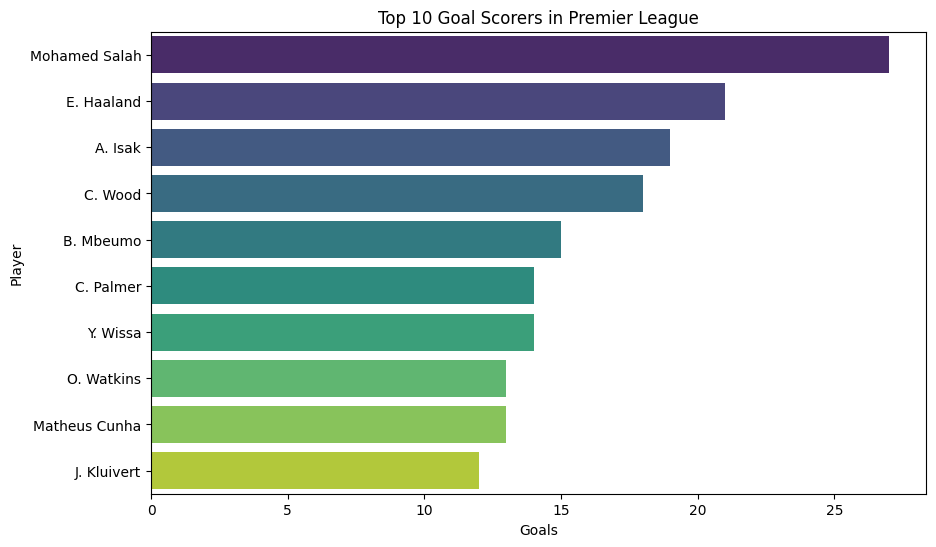

In [27]:
# Visualization: Top 10 Goal Scorers
plt.figure(figsize=(10, 6))
top_scorers = df.nlargest(10, 'Goals')
sns.barplot(x='Goals', y='Player Name', data=top_scorers, palette='viridis')
plt.xlabel("Goals")
plt.ylabel("Player")
plt.title("Top 10 Goal Scorers in Premier League")
plt.show()

### Goals vs Assists (Scatter Plot)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


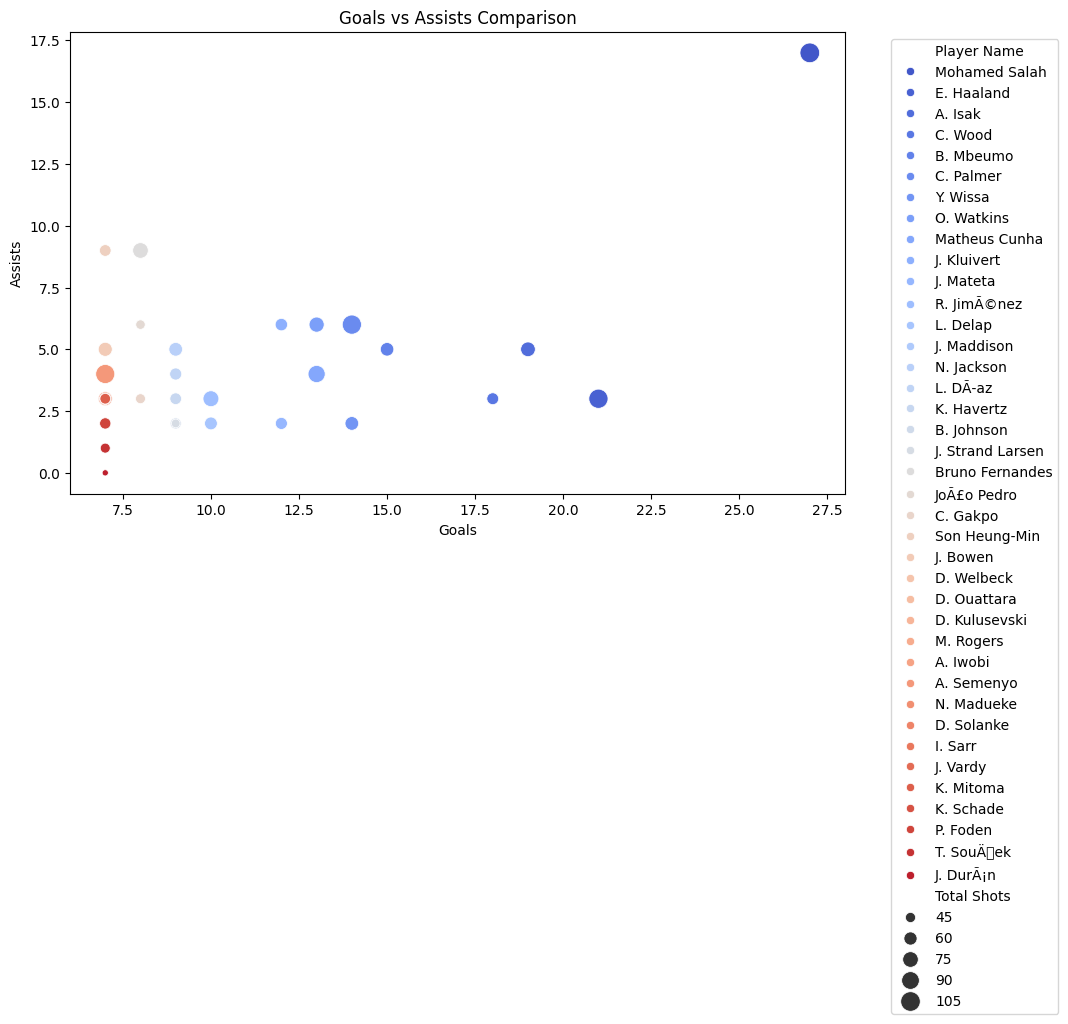

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Goals'], y=df['Assists'], hue=df['Player Name'], size=df['Total Shots'], sizes=(20, 200), palette='coolwarm')
plt.xlabel("Goals")
plt.ylabel("Assists")
plt.title("Goals vs Assists Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Goals Per Match (Bar Chart)

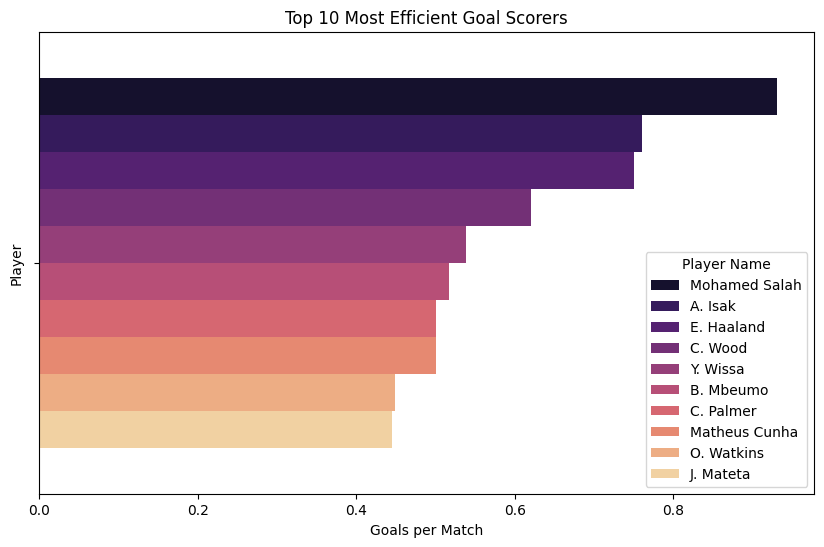

In [30]:
# Compare which players have the best goals per match ratio
df['Goals per Match'] = df['Goals'] / df['Played']
top_efficiency = df.nlargest(10, 'Goals per Match')

plt.figure(figsize=(10, 6))
sns.barplot(x='Goals per Match', hue='Player Name', data=top_efficiency, palette='magma')
plt.xlabel("Goals per Match")
plt.ylabel("Player")
plt.title("Top 10 Most Efficient Goal Scorers")
plt.show()

### Shot Accuracy (Bar Chart)

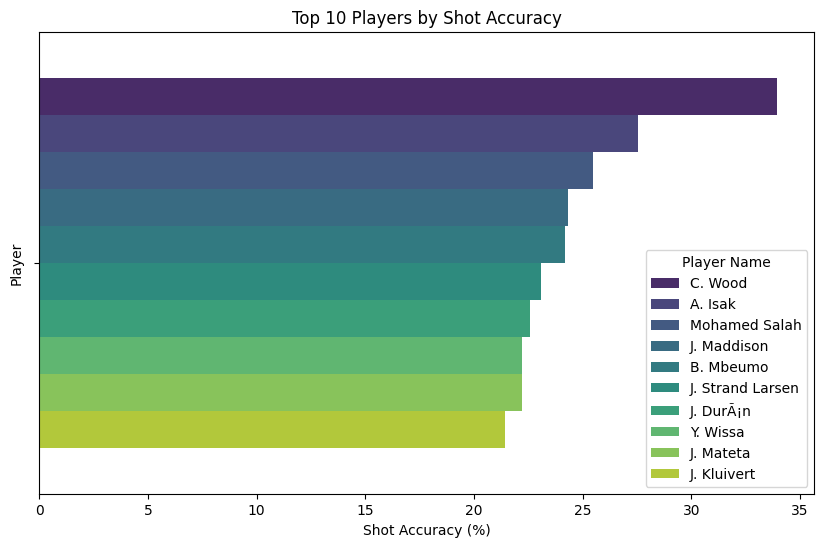

In [32]:
# Show which players convert their shots into goals most efficiently

df['Shot Accuracy (%)'] = (df['Goals'] / df['Total Shots']) * 100
top_accuracy = df.nlargest(10, 'Shot Accuracy (%)')

plt.figure(figsize=(10, 6))
sns.barplot(x='Shot Accuracy (%)', hue='Player Name', data=top_accuracy, palette='viridis')
plt.xlabel("Shot Accuracy (%)")
plt.ylabel("Player")
plt.title("Top 10 Players by Shot Accuracy")
plt.show()
